# Imports

In [1]:
from keras_preprocessing.image import load_img
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageOps
import cv2
from PIL import Image

# Load model

In [2]:
# Load model
model = keras.models.load_model('model.h5')

# Use model to predict image

In [16]:
# Image size
img_size = (1024, 1024)

# Load image
image = load_img('/Users/daniel/Desktop/ImagestoDBWithoutFrame/IMG_0173.JPG')

# Resize image
image = image.resize(img_size)

# Add dimension
image = np.expand_dims(image, axis=0)

In [17]:
# Predict on image
prediction = model.predict(image)

1/1 [==============================] - 4s 4s/step


# Plotting

In [18]:
# Remove first dimensipon
image = np.squeeze(image)
prediction = np.squeeze(prediction)

In [19]:
def get_pred(prediction):
    '''Turn prediction into image'''
    mask = np.argmax(prediction, axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    img = ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
    return img

In [20]:
# Get prediction image
pred = get_pred(prediction)

In [21]:
# Find indices of non-zero pixels
pred_array = np.array(pred)
idx = np.nonzero(pred_array)

# Create overlay image
overlayColor = Image.new(mode="RGB", size=img_size, color=(144,0,211))
overlay = image.copy()
overlay[idx] = 0.6*image[idx] + 0.4*np.array(overlayColor)[idx]

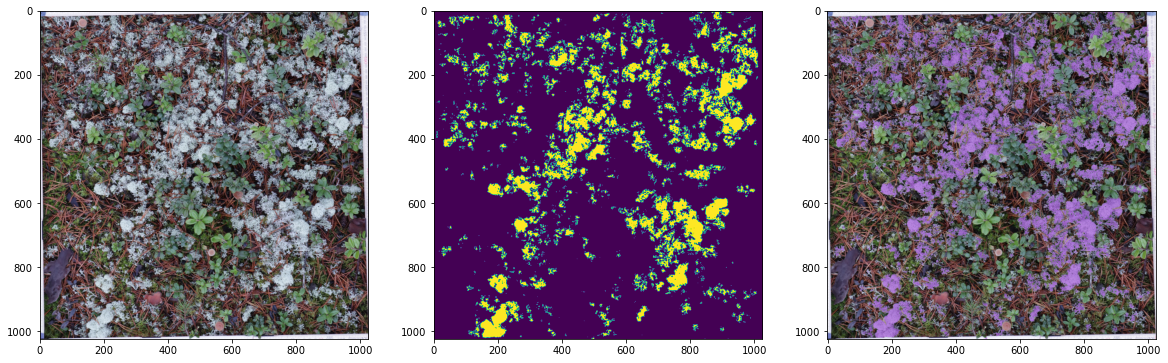

In [22]:
# Plot original image, prediction and overlay
plt.figure(figsize=(20, 28))
plt.subplot(3, 3, 1)
plt.imshow(image)
plt.subplot(3, 3, 2)
plt.imshow(pred)
plt.subplot(3, 3, 3)
plt.imshow(overlay)

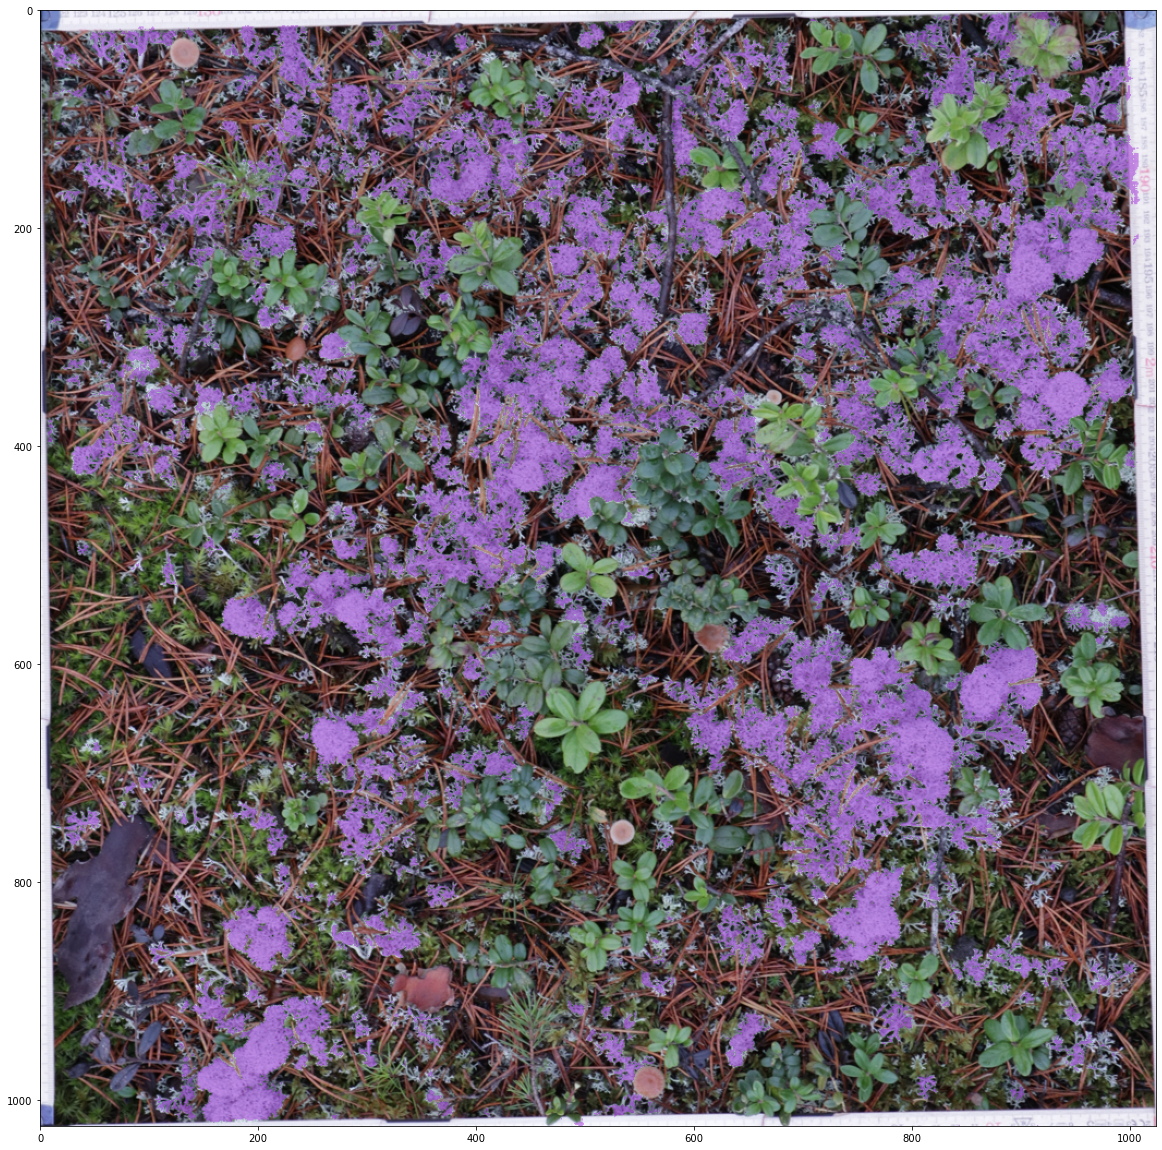

In [24]:
plt.figure(figsize=(20, 28))
plt.imshow(overlay)